In [1]:
####################################################################################
#                CHURN AND HAPPINESS - ANNABELLE CHUINARD - DEEPND                 # 
#                                PART 3: ML                                        #
####################################################################################

In [2]:
import numpy as np 
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.features import RFECV
from yellowbrick.classifier import ClassificationReport
from yellowbrick.regressor import PredictionError

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch


In [3]:
samplePath = '/home/anabel/DeepND/HappinessAndChurn/'

In [4]:
df = pd.read_csv( 
    samplePath + 'for_training.csv',
    sep = ',',
    index_col=0,
    engine = 'python') 

In [5]:
df.head()

employeeID  probeValue  probeDayOfWeek  probeDayOfYear  isIncreasing  \
0       10_1    3.309735        2.619469      203.911504             0   
1      10_18    3.295082        2.213115      187.262295             1   
2       10_2    3.272727        2.666667      224.424242             1   
3       10_3    3.155556        2.466667      232.133333             0   
4      10_30    3.214286        2.785714      228.071429             1   

   numComLiked  numComDisliked   avgComLen  likesPerMonth  dislikesPerMonth  \
0         28.0             2.0   53.640000           10.0              10.0   
1         13.0             2.0   19.444444            4.0               4.0   
2         15.0             0.0   27.750000            2.0               2.0   
3         22.0             0.0  108.809524            7.0               7.0   
4          2.0             0.0   72.750000            3.0               3.0   

   numProbe             lastDate  churn  churn_cat  
0       113  2017-03-20 01:00:00   True          1  
1        61  2017-03-15 19:25:51   True          1  
2        33  2017-02-23 14:01:07   True          1  
3        45  2017-03-17 01:00:00   True          1  
4        14  2017-03-11 01:00:00   True          1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 0 to 2589
Data columns (total 14 columns):
employeeID          2590 non-null object
probeValue          2590 non-null float64
probeDayOfWeek      2590 non-null float64
probeDayOfYear      2590 non-null float64
isIncreasing        2590 non-null int64
numComLiked         2590 non-null float64
numComDisliked      2590 non-null float64
avgComLen           2590 non-null float64
likesPerMonth       2590 non-null float64
dislikesPerMonth    2590 non-null float64
numProbe            2590 non-null int64
lastDate            2590 non-null object
churn               2590 non-null bool
churn_cat           2590 non-null int64
dtypes: bool(1), float64(8), int64(3), object(2)
memory usage: 285.8+ KB


/home/anabel/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/anabel/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/anabel/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/anabel/anaconda3/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


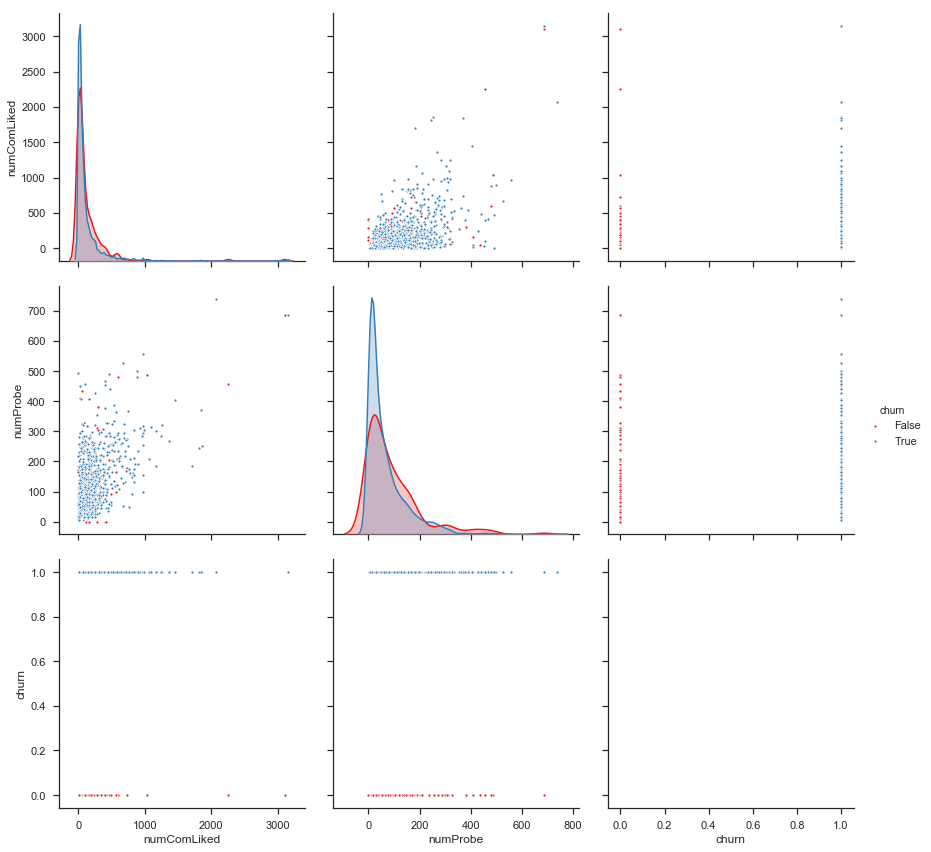

In [7]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[['numComLiked','numProbe', 'churn' ]], 
             hue="churn", 
             height=4,
             palette="Set1",
             markers=".")
plt.show()

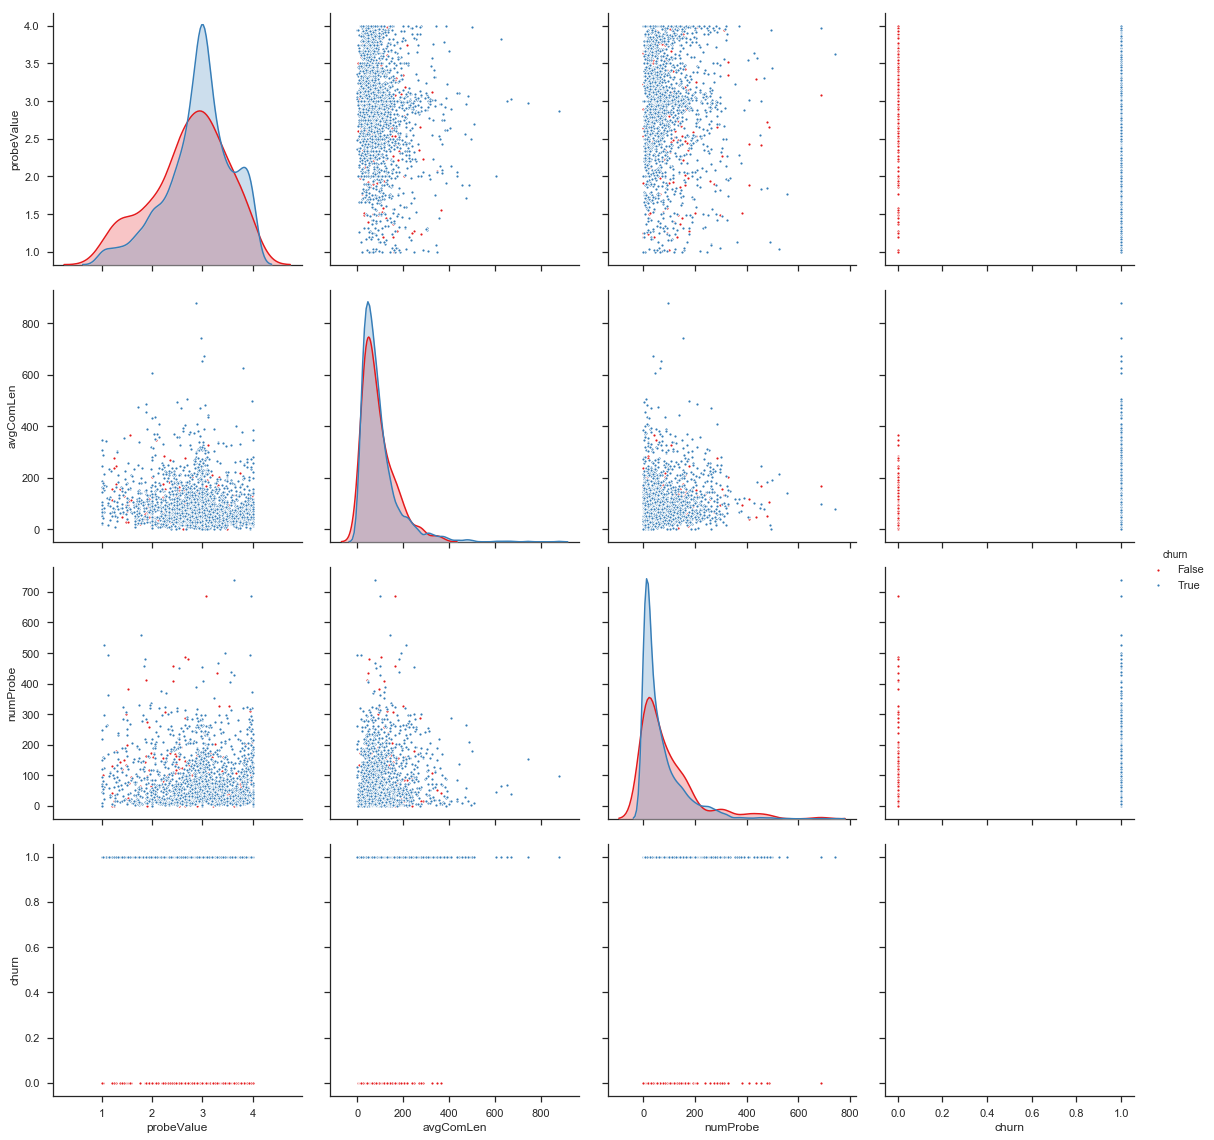

In [8]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[['probeValue','avgComLen','numProbe', 'churn' ]], 
             hue="churn", 
             height=4,
             palette="Set1",
             markers=".")
plt.show()

In [9]:
# Observation: People who churn tend to vote less and write slightly longer comments.

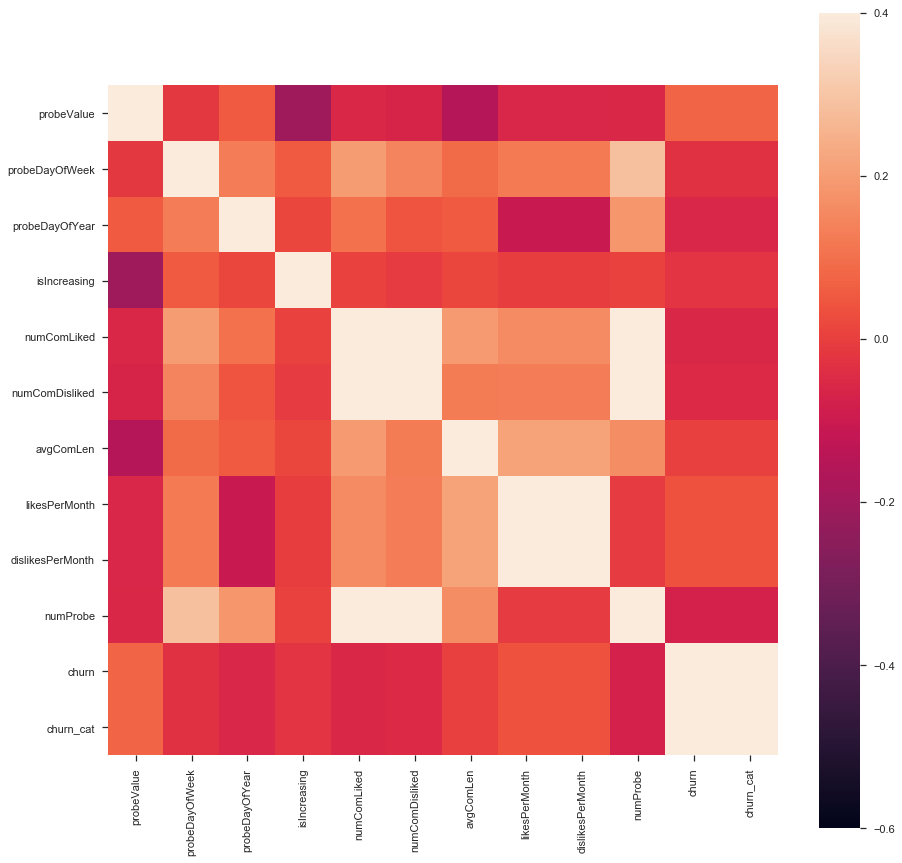

In [10]:

plt.figure(figsize=(15,15)) 
sns.heatmap(df.corr(), square=True, vmax= 0.4, vmin=-0.6)
plt.show()

In [11]:
# The features that seems to be the most correlated to churn are the happiness mark given (probe) 
# and the number of likes and dislikes the person gave per month.
# Surprisingly, the length of the comments seems to have more impact than the fact that the given rating 
# increased or not over the working period... 

In [12]:
# Splitting the data into a train and test sets (the size I want them to be)
df_new = df.drop(['churn', 'churn_cat', 'lastDate', 'employeeID', 'probeDayOfYear'],1)
train_data, test_data, train_label, test_label = train_test_split(df_new, df.churn_cat, test_size  = 0.45)

In [13]:
# Normalizing the data for central value to be around 0 (some algorithm only take matrices with values btw -1 and 1)
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  
test_data = scaler.transform(test_data)

/home/anabel/anaconda3/lib/python2.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anabel/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/home/anabel/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


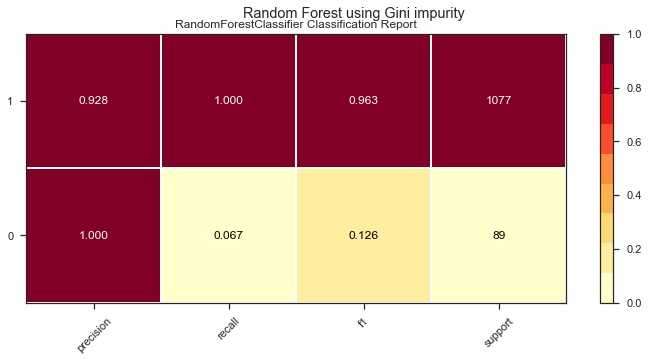

In [14]:
fig = plt.figure(figsize = (10,5))
fig.suptitle(t="Random Forest using Gini impurity", y=1.0)
visRFGini = ClassificationReport(RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None, min_samples_split = 0.05, min_samples_leaf = 0.001), classes=["0", "1"], support=True)
visRFGini.fit(train_data, train_label)  # Fit the visualizer and the model
visRFGini.score(test_data, test_label)  # Evaluate the model on the test data
visRFGini.poof()  

In [15]:
### fig = plt.figure(figsize = (10,5))
#fig.suptitle(t="Random Forest using Gini impurity", y=1.0)
#visRFGini = ClassificationReport(RandomForestClassifier(n_estimators=500, criterion = 'entropy', max_features = None, min_samples_split = 0.002, min_samples_leaf = 0.001), classes=["0", "1"], support=True)
#visRFGini.fit(train_data, train_label)  # Fit the visualizer and the model
#visRFGini.score(test_data, test_label)  # Evaluate the model on the test data
#visRFGini.poof()  

In [16]:
# Does good at predicting stay. Not so much for churn! Recall is low meaning a 80% of churners were predicted to stay...

In [17]:
# Example 1: For Random Forest with Gini impurity

#target = 'churn_cat'
#features = [col for col in df.drop(['employeeID','lastDate','churn'],1).columns if col != target]

#oz1= RFECV(RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None, min_samples_split = 0.002, min_samples_leaf = 0.001),cv=5)
#X = df[features]
#y = df[target]
#oz1.fit(X, y)
#oz1.poof()

In [18]:
#col_array= np.asarray(features)
#print("Feature Ranking: ")
#for i in range (0, len(col_array)):
#    print ( col_array[i],  oz1.ranking_[i])

In [19]:
# The average day of the year the people vote, seems to be a predictor... The fact that the rating increase over time is not impacting, as well as the number of likes received per month.
# This shows that probably there is some missing information in this datasets (some companies have more churn than others...). Let try to remove it an rerunn.

In [20]:
# Splitting the data into a train and test sets (the size I want them to be)
df_new = df.drop(['churn', 'churn_cat', 'lastDate', 'employeeID', 'probeDayOfYear'],1)
train_data, test_data, train_label, test_label = train_test_split(df_new, df.churn_cat, test_size  = 0.45)

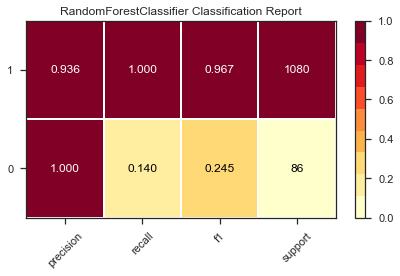

In [21]:
### fig = plt.figure(figsize = (10,5))
fig.suptitle(t="Random Forest using entropic impurity", y=1.0)
visRFGini = ClassificationReport(RandomForestClassifier(n_estimators=500, criterion = 'entropy', max_features = None, min_samples_split = 0.001, min_samples_leaf = 0.0005), classes=["0", "1"], support=True)
visRFGini.fit(train_data, train_label)  # Fit the visualizer and the model
visRFGini.score(test_data, test_label)  # Evaluate the model on the test data
visRFGini.poof() 

In [22]:
# Without it, we get a 22% f1... Which is worse... But this is life.

In [23]:
# Example 1: For Random Forest with Gini impurity

#target = 'churn_cat'
#features = [col for col in df.drop(['employeeID','lastDate','churn','probeDayOfYear'],1).columns if col != target]

#oz1= RFECV(RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None, min_samples_split = 0.001, min_samples_leaf = 0.0005),cv=5)
#X = df[features]
#y = df[target]
#oz1.fit(X, y)
#oz1.poof()

In [24]:
#col_array= np.asarray(features)
#print("Feature Ranking: ")
#for i in range (0, len(col_array)):
#    print ( col_array[i],  oz1.ranking_[i])

In [25]:
df_new = df.drop(['churn', 'lastDate', 'probeDayOfYear','isIncreasing', 'likesPerMonth'],1)
train_data, test_data, train_label, test_label = train_test_split(df_new, df.churn_cat, test_size  = 0.5)

In [26]:
df_new

employeeID  probeValue  probeDayOfWeek  numComLiked  numComDisliked  \
0          10_1    3.309735        2.619469         28.0             2.0   
1         10_18    3.295082        2.213115         13.0             2.0   
2          10_2    3.272727        2.666667         15.0             0.0   
3          10_3    3.155556        2.466667         22.0             0.0   
4         10_30    3.214286        2.785714          2.0             0.0   
5         10_32    3.111111        2.111111          3.0             3.0   
6         10_34    4.000000        3.500000          1.0             0.0   
7         10_35    3.000000        4.000000          2.0             0.0   
8         10_35    3.000000        4.000000          2.0             0.0   
9         10_37    4.000000        2.200000          4.0             0.0   
10        10_38    3.722222        2.305556          7.0             1.0   
11        10_39    3.800000        2.500000          7.0             1.0   
12        10_48    4.000000        2.000000          3.0             0.0   
13        10_50    3.320000        2.160000          2.0             0.0   
14        10_56    4.000000        4.500000          1.0             0.0   
15        10_58    3.142857        2.857143          3.0             2.0   
16        10_60    4.000000        0.500000          1.0             1.0   
17        10_61    2.500000        3.000000          1.0             0.0   
18        10_79    3.755556        2.688889         32.0             3.0   
19         10_8    3.845455        2.281818         66.0            61.0   
20         10_9    3.790698        2.430233        109.0            14.0   
21       11_101    3.973837        2.924419       3151.0           623.0   
22       11_103    2.263889        2.208333        102.0             5.0   
23       11_110    3.442000        2.906000        889.0           229.0   
24       11_112    1.772401        2.915771        973.0           105.0   
25       11_113    2.235294        2.411765          8.0             0.0   
26       11_115    1.766667        2.541667         75.0             5.0   
27       11_117    1.036122        2.952471        667.0            49.0   
28       11_118    3.000000        3.000000         49.0            17.0   
29       11_118    3.000000        3.000000         49.0            17.0   
...         ...         ...             ...          ...             ...   
2560       9_39    3.031250        1.875000         12.0             2.0   
2561        9_4    3.802083        2.010417          5.0             1.0   
2562       9_40    3.184211        1.907895        252.0            54.0   
2563       9_42    3.411765        2.617647         20.0             2.0   
2564       9_45    3.583784        2.594595       1166.0           203.0   
2565        9_5    3.459459        2.072072         30.0            12.0   
2566       9_53    2.878049        2.256098         29.0            16.0   
2567       9_54    2.800000        1.700000          5.0             3.0   
2568       9_55    2.787879        2.121212         17.0             0.0   
2569        9_6    3.993056        3.041667         89.0            22.0   
2570       9_67    2.954545        1.454545         44.0             4.0   
2571       9_68    3.474138        2.094828        102.0            68.0   
2572       9_69    3.061404        1.947368         97.0            63.0   
2573        9_7    3.964824        2.597990         73.0             6.0   
2574       9_71    3.851852        2.259259          9.0             3.0   
2575       9_75    3.445378        2.100840        247.0            64.0   
2576       9_78    3.409639        2.301205        139.0            13.0   
2577        9_8    3.745856        2.303867        108.0            28.0   
2578       9_80    3.080808        2.373737         39.0             2.0   
2579       9_83    2.892857        2.392857         31.0             1.0   
2580       9_85    2.776119        1.925373         3

In [27]:
# CLUSTERING THESE PEOPLE

In [28]:
pca = PCA(n_components=3)
pca.fit(df_new.drop('employeeID', 1))
components = pca.transform(df_new.drop('employeeID', 1))
components = pd.DataFrame(components,columns=['c1','c2','c3'])


In [29]:
components.head()

c1         c2         c3
0  -69.790075 -59.222882 -11.250748
1 -101.458849 -64.603076 -49.136134
2 -106.942528 -60.609792 -45.313776
3  -89.440230 -38.323933  32.030546
4 -120.105522 -44.834163  -4.258348

In [30]:
tocluster = pd.DataFrame(components[['c1','c3']])


In [31]:
#c_preds = AgglomerativeClustering(n_clusters=2).fit_predict(tocluster)
c_preds = Birch(threshold=0.04, branching_factor=100, n_clusters=4, compute_labels=True, copy=True).fit_predict(tocluster)
birchClust = Birch(threshold=0.04, branching_factor=100, n_clusters=4, compute_labels=True, copy=True)
birchClust.fit(tocluster)
#c_preds = DBSCAN(min_samples=5, eps=20, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit_predict(tocluster)
#centers = clusterer.cluster_centers_

#c_preds = clusterer.fitpredct(tocluster)

Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=4,
   threshold=0.04)

In [32]:
c_preds[100:500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 3, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,

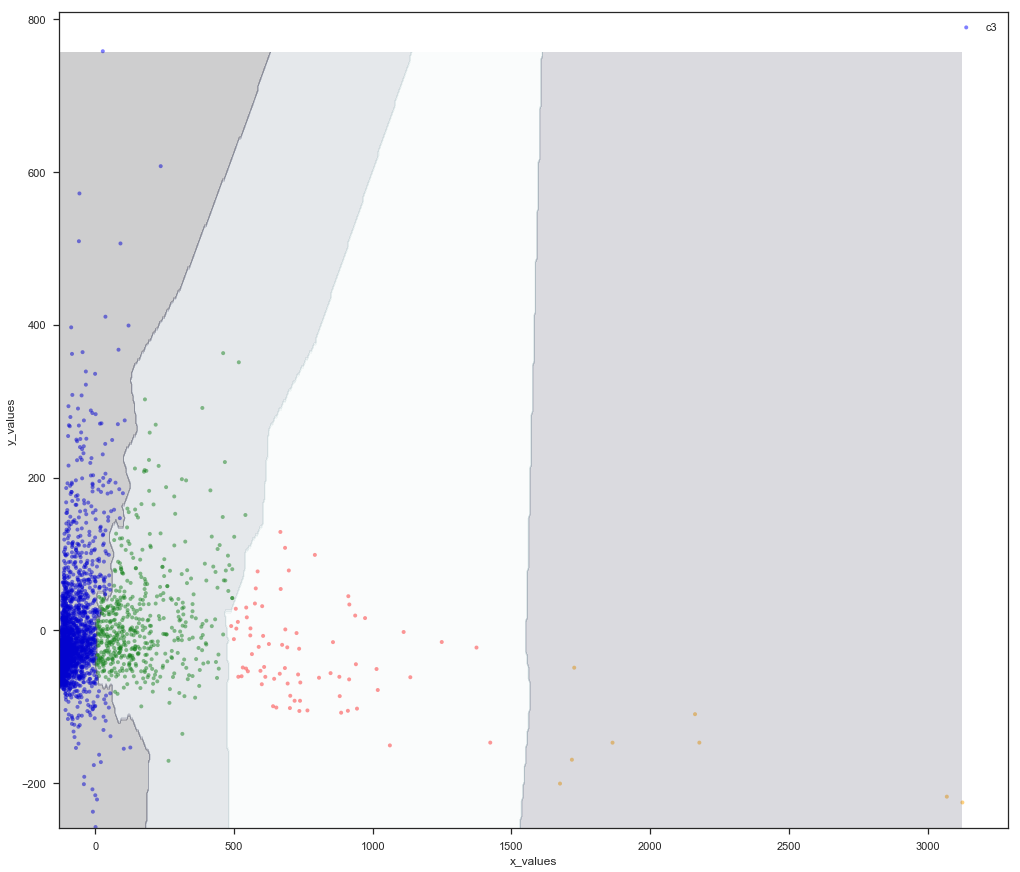

In [36]:

x_min, x_max = tocluster['c1'].min() - 1, tocluster['c1'].max() + 1
y_min, y_max = tocluster['c3'].min() - 1, tocluster['c3'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 5),np.arange(y_min, y_max, 5))
Z = birchClust.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(17,15))
colors = ['blue','orange','green','red','purple','brown','pink','white']
colored = [colors[k] for k in c_preds]

plt.scatter(tocluster['c1'],tocluster['c3'],alpha=0.5, s=16, linewidths=0, color=colored)
plt.contourf(xx, yy, Z,  alpha=0.2, cmap=plt.cm.bone)
#plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
#for ci,c in enumerate(centers):
#    plt.plot(c[0], c[1], 'o', markersize=15, color='black', alpha=0.5, label=''+str(ci))
#    plt.annotate(str(ci), (c[0],c[1]),fontsize=24,fontweight='bold')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [37]:
df_new['cluster']=c_preds

In [38]:
df_new.head()

employeeID  probeValue  probeDayOfWeek  numComLiked  numComDisliked  \
0       10_1    3.309735        2.619469         28.0             2.0   
1      10_18    3.295082        2.213115         13.0             2.0   
2       10_2    3.272727        2.666667         15.0             0.0   
3       10_3    3.155556        2.466667         22.0             0.0   
4      10_30    3.214286        2.785714          2.0             0.0   

    avgComLen  dislikesPerMonth  numProbe  churn_cat  cluster  
0   53.640000              10.0       113          1        0  
1   19.444444               4.0        61          1        0  
2   27.750000               2.0        33          1        0  
3  108.809524               7.0        45          1        0  
4   72.750000               3.0        14          1        0

In [39]:
tot_churn = len(df_new[df_new['churn_cat']==0])
tot_cluster = df_new.groupby('cluster').count()['employeeID']

In [40]:
tot_churn

198

In [41]:
tot_cluster

cluster
0    1986
1       8
2     524
3      72
Name: employeeID, dtype: int64

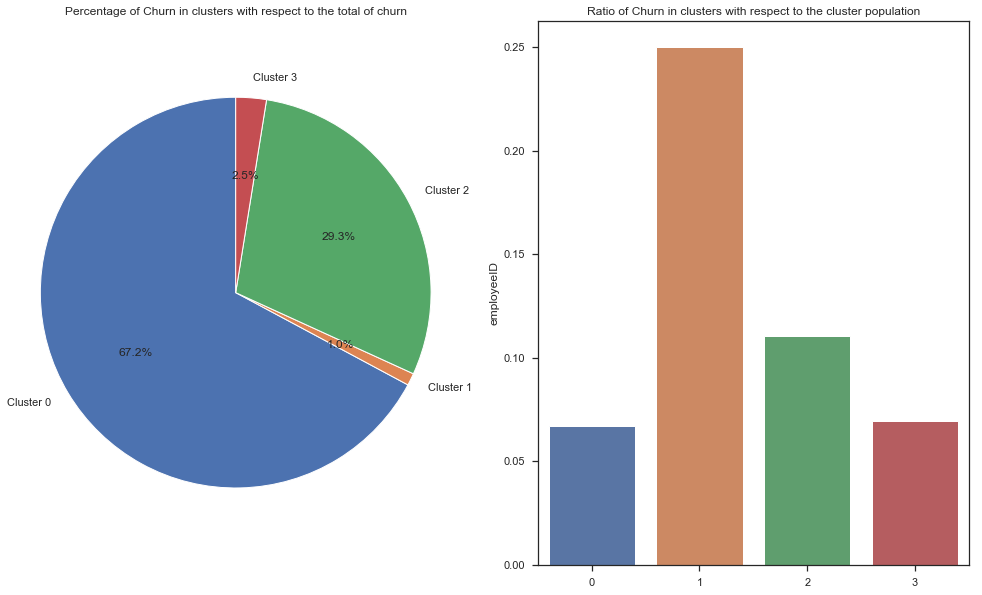

In [42]:
tmp = df_new[df_new['churn_cat']==0].groupby('cluster',as_index='False').count()['employeeID']
churn_perc_totchurn = tmp/tot_churn
churn_perc_totcluster = tmp/tot_cluster
churn_perc_totcluster
tmp

fig1, axarr = plt.subplots(1,2,figsize=(17,10))
explode = (0, 0, 0.2, 0)
labels = 'Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3'
axarr[0].pie(churn_perc_totchurn, labels=labels, autopct='%1.1f%%', startangle=90)
axarr[0].axis('equal')  
axarr[0].set_title('Percentage of Churn in clusters with respect to the total of churn')
sns.barplot(x=[0,1,2,3],y=churn_perc_totcluster,ax=axarr[1])
axarr[1].set_title('Ratio of Churn in clusters with respect to the cluster population')
plt.show()

In [ ]:
# Observation: One category of cluster contains 20% of people churning...

In [ ]:
tmp